In [2]:
from fastai.text.all import *
import pandas as pd

In [5]:
train_df = pd.read_csv('./nlp-getting-started/train.csv')
valid_df = pd.read_csv('./nlp-getting-started/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [11]:
import torch
import torchtext
from torchtext.data import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [18]:
from collections import Counter

token_counter = Counter()

for sample_text in train_df['text']:
    tokens = tokenizer(sample_text)
    token_counter.update(tokens)

token_counter.most_common(n=25)

[('.', 11696),
 ('//t', 4718),
 ('http', 4309),
 ('the', 3266),
 ("'", 3157),
 ('?', 3126),
 ('a', 2183),
 ('in', 1973),
 ('to', 1944),
 ('of', 1822),
 ('i', 1740),
 ('and', 1420),
 ('!', 1173),
 ('is', 948),
 ('s', 895),
 ('for', 891),
 ('you', 888),
 ('on', 852),
 ('-', 782),
 ('it', 765),
 ('my', 677),
 ('that', 618),
 ('with', 570),
 ('at', 538),
 ('by', 519)]

In [22]:
token_counter.most_common()[-25:]

[('co/vz640xoswj', 1),
 ('co/m2hpnoak8b', 1),
 ('co/thhjjw51pe', 1),
 ('ayyo', 1),
 ('dei', 1),
 ('explosives-packed', 1),
 ('co/nz7ackrrji', 1),
 ('#tnwx', 1),
 ('#nws', 1),
 ('co/fwqfckncqw', 1),
 ('co/5b7qt2yxda', 1),
 ('father-of-three', 1),
 ('overtaking', 1),
 ('#bathandnortheastsomerset', 1),
 ('co/fa3fcnln86', 1),
 ('9km', 1),
 ('#la', 1),
 ('co/5uecmcv2pk', 1),
 ('forney', 1),
 ('developing', 1),
 ('symptoms', 1),
 ('co/rqkk15uhey', 1),
 ('co/nf4iculoje', 1),
 ('co/stfmbbzfb5', 1),
 ('co/ymy4rskq3d', 1)]

In [26]:
sorted_counter = dict(token_counter.most_common())

In [110]:
sorted_counter = dict(token_counter.most_common())

# Create vocab containing tokens with a minimum frequency of 20
my_vocab = torchtext.vocab.vocab(sorted_counter, min_freq=20)

# Add the unknown token, and use this by default for unknown words
unk_token = '<unk>'
my_vocab.insert_token(unk_token, 0)
my_vocab.set_default_index(0)

# Add the pad token
pad_token = '<pad>'
my_vocab.insert_token(pad_token, 1)

# Show vocab size, and examples of tokens
len(my_vocab.get_itos()), my_vocab.get_itos()[:25]


(875,
 ['<unk>',
  '<pad>',
  '.',
  '//t',
  'http',
  'the',
  "'",
  '?',
  'a',
  'in',
  'to',
  'of',
  'i',
  'and',
  '!',
  'is',
  's',
  'for',
  'you',
  'on',
  '-',
  'it',
  'my',
  'that',
  'with'])

In [28]:
glove = torchtext.vocab.GloVe(name = '6B', dim = 100)
glove.vectors.shape

.vector_cache/glove.6B.zip: 862MB [02:56, 4.89MB/s]                               
100%|█████████▉| 398793/400000 [00:22<00:00, 16696.01it/s]

torch.Size([400000, 100])

100%|█████████▉| 398793/400000 [00:40<00:00, 16696.01it/s]

In [29]:
my_vocab.vectors = glove.get_vecs_by_tokens(my_vocab.get_itos())
my_vocab.vectors.shape

torch.Size([875, 100])

In [37]:
index = 10
my_vocab.get_itos()[index], my_vocab.vectors[index]

('to', tensor([-1.8970e-01,  5.0024e-02,  1.9084e-01, -4.9184e-02, -8.9737e-02,
          2.1006e-01, -5.4952e-01,  9.8377e-02, -2.0135e-01,  3.4241e-01,
         -9.2677e-02,  1.6100e-01, -1.3268e-01, -2.8160e-01,  1.8737e-01,
         -4.2959e-01,  9.6039e-01,  1.3972e-01, -1.0781e+00,  4.0518e-01,
          5.0539e-01, -5.5064e-01,  4.8440e-01,  3.8044e-01, -2.9055e-03,
         -3.4942e-01, -9.9696e-02, -7.8368e-01,  1.0363e+00, -2.3140e-01,
         -4.7121e-01,  5.7126e-01, -2.1454e-01,  3.5958e-01, -4.8319e-01,
          1.0875e+00,  2.8524e-01,  1.2447e-01, -3.9248e-02, -7.6732e-02,
         -7.6343e-01, -3.2409e-01, -5.7490e-01, -1.0893e+00, -4.1811e-01,
          4.5120e-01,  1.2112e-01, -5.1367e-01, -1.3349e-01, -1.1378e+00,
         -2.8768e-01,  1.6774e-01,  5.5804e-01,  1.5387e+00,  1.8859e-02,
         -2.9721e+00, -2.4216e-01, -9.2495e-01,  2.1992e+00,  2.8234e-01,
         -3.4780e-01,  5.1621e-01, -4.3387e-01,  3.6852e-01,  7.4573e-01,
          7.2102e-02,  2.7931e-0

In [38]:
for i in range(my_vocab.vectors.shape[0]):
    if my_vocab.vectors[i].equal(torch.zeros(100)):
        my_vocab.vectors[i] = torch.randn(100)

## One Sample

In [39]:
sample_text = train_df['text'][0]
sample_text

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [40]:
tokens = L(tokenizer(sample_text))
tokens

(#13) ['our','deeds','are','the','reason','of','this','#earthquake','may','allah'...]

In [43]:
numericalized_tokens = [my_vocab[token] for token in tokens]
# numericalized_tokens = torch.tensor(numericalized_tokens)
numericalized_tokens

[121, 0, 31, 5, 837, 11, 27, 0, 138, 0, 0, 100, 50]

In [54]:
length_list = []
for i in range(len(valid_df)):
    numericalized_tokens = [my_vocab[token] for token in tokens]
    sample_text = valid_df['text'][i]
    tokens = tokenizer(sample_text)
    length_list.append(len(tokens))
max(length_list)

58

In [55]:
max_tokens = 80

numericalized_tokens = [my_vocab[token] for token in tokens]

if len(numericalized_tokens) < max_tokens:
    numericalized_tokens += [1] * (max_tokens-len(numericalized_tokens))
else:
    numericalized_tokens = numericalized_tokens[:max_tokens]

numericalized_tokens = torch.tensor(numericalized_tokens)
numericalized_tokens

tensor([  0,  56,   0, 156,   0,  82, 264,   2,   0,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

## Model

In [90]:
from torch import nn

class Simple_Dataset(torch.utils.data.Dataset):
    def __init__(self, df, vocab, max_tokens):
        self.df = df
        self.vocab = vocab
        self.max_length = max_tokens
        self.tokenizer = get_tokenizer("basic_english")
        
    def __len__(self):
        return len(self.df)

    def decode(self, numericalized_tokens):
        return ' '.join([self.vocab.get_itos()[num] for num in numericalized_tokens])

    def __getitem__(self, index):
        _, _, _, text, target = self.df.iloc[index]
        label = torch.tensor(target)

        tokens = tokenizer(text)
        numericalized_tokens = [my_vocab[token] for token in tokens]

        if len(numericalized_tokens) < max_tokens:
            numericalized_tokens += [1] * (max_tokens-len(numericalized_tokens))
        else:
            numericalized_tokens = numericalized_tokens[:max_tokens]

        numericalized_tokens = torch.tensor(numericalized_tokens)
        
        return numericalized_tokens, label
    
    
class Model(nn.Module):
    def __init__(self, vocab, num_classes):
        super().__init__()
        
        vocab_size, emb_size = vocab.vectors.shape
        self.emb = nn.Embedding(vocab_size, emb_size, _weight=vocab.vectors)
        
        self.lstm = nn.LSTM(input_size = emb_size, hidden_size = 64, batch_first = True, num_layers = 2)
        
        self.head = nn.Sequential(nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, num_classes))
        
    def forward(self, batch_data):

        token_embs = self.emb(batch_data)
        
        outputs, (h_n, c_n) = self.lstm(token_embs)
        
        # Assuming a batch size of 32, h_n will have a shape of:
        
        # shape = 2, 32, 64
        last_hidden_state = h_n
        # shape = 32, 2, 64
        last_hidden_state = last_hidden_state.permute(1,0,2)
        # shape = 32, 128
        last_hidden_state = last_hidden_state.flatten(start_dim=1)

        logits = self.head(last_hidden_state)
        
        return logits

In [91]:
train_dataset = Simple_Dataset(train_df, vocab=my_vocab, max_tokens=128)
valid_dataset = Simple_Dataset(valid_df, vocab=my_vocab, max_tokens=128)
len(train_dataset), len(valid_dataset)

train_dl = DataLoader(train_dataset, bs=16, shuffle=True)
valid_dl = DataLoader(valid_dataset, bs=16)
dls = DataLoaders(train_dl, valid_dl)


In [92]:
tokens, label = train_dataset[0]
tokens

tensor([121,   0,  31,   5, 837,  11,  27,   0, 138,   0,   0, 100,  50,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

In [101]:
model = Model(my_vocab, num_classes=2)
total_params = 0
for p in model.parameters():
    total_params += p.numel()
total_params

171662

In [103]:
batched_data, batched_labels = train_dl.one_batch()
print(batched_data.shape, batched_labels.shape)
with torch.no_grad():
    logits = model(batched_data)
logits.shape

loss_func = nn.CrossEntropyLoss()

loss = loss_func(logits, batched_labels)
loss

torch.Size([16, 80]) torch.Size([16])


tensor(0.6998)

In [105]:
learn = Learner(dls, model, loss_func=nn.CrossEntropyLoss(), metrics=[accuracy])

SuggestedLRs(valley=0.0010000000474974513)

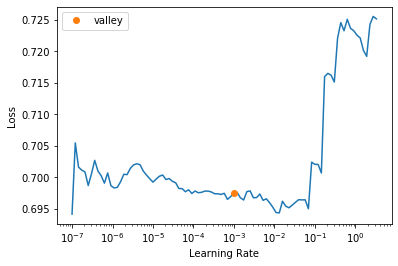

In [106]:
learn.lr_find()

In [108]:
learn.fit_one_cycle(5, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time


ValueError: not enough values to unpack (expected 5, got 4)